In [163]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import pandas as pd
from datetime import datetime
import matplotlib.ticker as mticker
import matplotlib.dates as md
import datetime

In [164]:
cmap = ["#7570b3", "#1d84c6", "#0095bf", "#00a0a1", "#00a676", "#3da95b", "#63aa3a", 
          "#88a906", "#a0ab00", "#b7ac00", "#cfac00", "#e6ab01"]

#sns.set_palette(sns.color_palette(cmap))

In [165]:
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":25,"axes.labelsize":20})  
sns.set(font_scale=2.2)
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['xtick.major.width'] = 4
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
sns.set_style('ticks')

In [166]:
# Loading the dataframes with hourly granularity

file = open(r'data/daily_fitbit_df_unprocessed.pkl','rb')
df = pickle.load(file)
file.close()

#df

In [167]:
list(df)

['id',
 'date',
 'nightly_temperature',
 'nremhr',
 'rmssd',
 'spo2',
 'full_sleep_breathing_rate',
 'stress_score',
 'sleep_points_percentage',
 'exertion_points_percentage',
 'responsiveness_points_percentage',
 'daily_temperature_variation',
 'badgeType',
 'calories',
 'filteredDemographicVO2Max',
 'distance',
 'activityType',
 'bpm',
 'lightly_active_minutes',
 'moderately_active_minutes',
 'very_active_minutes',
 'sedentary_minutes',
 'mindfulness_session',
 'scl_avg',
 'resting_hr',
 'sleep_duration',
 'minutesToFallAsleep',
 'minutesAsleep',
 'minutesAwake',
 'minutesAfterWakeup',
 'sleep_efficiency',
 'sleep_deep_ratio',
 'sleep_wake_ratio',
 'sleep_light_ratio',
 'sleep_rem_ratio',
 'steps',
 'minutes_in_default_zone_1',
 'minutes_below_default_zone_1',
 'minutes_in_default_zone_2',
 'minutes_in_default_zone_3',
 'age',
 'gender',
 'height',
 'weight']

In [168]:
del df["age"]
del df["gender"]
del df["height"]
del df["weight"]
del df["calories"]
del df["mindfulness_session"]
del df["lightly_active_minutes"]
del df["moderately_active_minutes"]
del df["very_active_minutes"]
del df["sedentary_minutes"]

In [169]:
df['date'] = pd.to_datetime(df.date, format='%Y/%m/%d') 
#df['date'] = pd.to_datetime(df['date']).dt.date
df = df.astype({"id": str})
df = df.sort_values('date')

In [170]:
df = df.melt(["id", "date"], var_name='fitibit_type', value_name='value')
df

,id,date,fitibit_type,value
0,621e339967b776a240e502de,1970-01-01,nightly_temperature,NaN
1,621e326767b776a24012e179,1970-01-01,nightly_temperature,NaN
2,621e360b67b776a24039709f,1970-01-01,nightly_temperature,NaN
3,621e314867b776a24029ebf9,2015-09-21,nightly_temperature,NaN
4,621e2f1b67b776a240b3d87c,2015-09-22,nightly_temperature,NaN
...,...,...,...,...
436507,621e2f5767b776a240d8f9d6,2022-03-08,minutes_in_default_zone_3,NaN
436508,621e345267b776a240691064,2022-03-09,minutes_in_default_zone_3,NaN
436509,621e2f5767b776a240d8f9d6,2022-03-09,minutes_in_default_zone_3,NaN
436510,621e2f5767b776a240d8f9d6,2022-03-10,minutes_in_default_zone_3,NaN


In [171]:
df=df.dropna()
df

,id,date,fitibit_type,value
2729,621e362467b776a2404ad513,2020-11-12,nightly_temperature,34.41602
2736,621e362467b776a2404ad513,2020-11-13,nightly_temperature,34.143557
2739,621e36f967b776a240e5e7c9,2020-11-13,nightly_temperature,33.623823
2742,621e362467b776a2404ad513,2020-11-14,nightly_temperature,33.969215
2744,621e36f967b776a240e5e7c9,2020-11-14,nightly_temperature,33.507587
...,...,...,...,...
436254,621e2eaf67b776a2406b14ac,2022-02-09,minutes_in_default_zone_3,4.0
436265,621e340467b776a2402d7982,2022-02-10,minutes_in_default_zone_3,1.0
436268,621e346f67b776a24081744f,2022-02-10,minutes_in_default_zone_3,0.0
436273,621e2eaf67b776a2406b14ac,2022-02-10,minutes_in_default_zone_3,0.0


In [172]:
df=df.groupby(['date','fitibit_type']).agg('id').nunique()
df=pd.DataFrame(df)
df.reset_index(inplace=True)
#df['date'] = pd.to_datetime(df.date, format='%m/%d/%y') 
df.rename(columns = {'id':'NumberOfDistictUsers'}, inplace = True)
df

,date,fitibit_type,NumberOfDistictUsers
0,2015-09-22,activityType,1
1,2015-09-22,badgeType,1
2,2015-09-22,bpm,1
3,2015-09-22,distance,1
4,2015-09-22,minutes_below_default_zone_1,1
...,...,...,...
24584,2022-02-11,sleep_points_percentage,1
24585,2022-02-11,sleep_rem_ratio,1
24586,2022-02-11,sleep_wake_ratio,1
24587,2022-02-11,steps,1


In [173]:
# Separating the two Rounds
df1 = df[(df['date'] >= "2021-05-24") & (df['date'] <= "2021-07-26")] #Round1
df2 = df[(df['date'] >= "2021-11-15") & (df['date'] <= "2022-01-17")] #Round2

In [174]:
df1['date'] = pd.to_datetime(df1.date, format='%Y/%m/%d') 
df1['date'] = pd.to_datetime(df1['date']).dt.date

df2['date'] = pd.to_datetime(df2.date, format='%Y/%m/%d') 
df2['date'] = pd.to_datetime(df2['date']).dt.date

C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_37332/632422508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = pd.to_datetime(df1.date, format='%Y/%m/%d')
C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_37332/632422508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = pd.to_datetime(df1['date']).dt.date
C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_37332/632422508.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [175]:
piv1 = pd.pivot_table(df1, values="NumberOfDistictUsers",index=["fitibit_type"], columns=["date"], fill_value=0)

piv2 = pd.pivot_table(df2, values="NumberOfDistictUsers",index=["fitibit_type"], columns=["date"], fill_value=0)

In [176]:
#piv1.reset_index(inplace=True)
#piv2.reset_index(inplace=True)

In [177]:
piv1

date,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29,2021-05-30,2021-05-31,2021-06-01,2021-06-02,...,2021-07-17,2021-07-18,2021-07-19,2021-07-20,2021-07-21,2021-07-22,2021-07-23,2021-07-24,2021-07-25,2021-07-26
fitibit_type,,,,,,,,,,,,,,,,,,,,,
activityType,19,22,17,15,25,30,17,19,26,23,...,18,9,16,19,13,15,15,11,16,8
badgeType,2,3,2,1,5,10,4,4,4,7,...,4,3,3,3,3,4,6,6,7,4
bpm,39,38,37,39,40,39,40,39,39,39,...,28,30,30,31,31,30,29,30,30,26
daily_temperature_variation,25,28,29,30,28,28,29,31,31,32,...,19,22,21,23,21,19,19,19,23,20
distance,38,38,37,39,40,39,40,39,39,39,...,27,28,30,31,31,30,29,30,31,28
exertion_points_percentage,15,18,18,17,19,16,19,20,18,21,...,10,13,11,13,12,10,13,10,11,11
filteredDemographicVO2Max,37,36,37,39,38,39,40,39,38,39,...,29,30,30,31,31,27,27,28,26,26
full_sleep_breathing_rate,14,17,19,19,20,19,21,20,20,21,...,15,16,15,17,15,14,14,14,17,17
minutesAfterWakeup,26,30,31,30,29,28,29,33,31,34,...,19,22,21,23,22,21,21,20,24,21


In [178]:
piv1.rename(index = {"activityType": "Activity", "badgeType":"Badge","daily_temperature_variation":"Daily Temperature", "exertion_points_percentage":"Exertion Points", "filteredDemographicVO2Max":"VO2Max",
                    "full_sleep_breathing_rate":"sleep_breathing_rate","minutesAfterWakeup":"MinsAfterWakeup","minutesAsleep":"MinsAsleep",
                    "minutesAwake":"MinsAwake","minutesToFallAsleep":"MinsToFallAsleep","minutes_below_default_zone_1":"mins_below_zone_1",
                    "minutes_in_default_zone_1":"mins_in_zone_1","minutes_in_default_zone_2":"mins_in_zone_2","minutes_in_default_zone_3":"mins_in_zone_3",
                    "responsiveness_points_percentage":"responsiveness_points","sleep_points_percentage":"sleep_points"}, inplace = True)

piv2.rename(index = {"activityType": "Activity", "badgeType":"Badge","daily_temperature_variation":"Daily Temperature", "exertion_points_percentage":"Exertion Points", "filteredDemographicVO2Max":"VO2Max",
                    "full_sleep_breathing_rate":"sleep_breathing_rate","minutesAfterWakeup":"MinsAfterWakeup","minutesAsleep":"MinsAsleep",
                    "minutesAwake":"MinsAwake","minutesToFallAsleep":"MinsToFallAsleep","minutes_below_default_zone_1":"mins_below_zone_1",
                    "minutes_in_default_zone_1":"mins_in_zone_1","minutes_in_default_zone_2":"mins_in_zone_2","minutes_in_default_zone_3":"mins_in_zone_3",
                    "responsiveness_points_percentage":"responsiveness_points","sleep_points_percentage":"sleep_points"}, inplace = True)

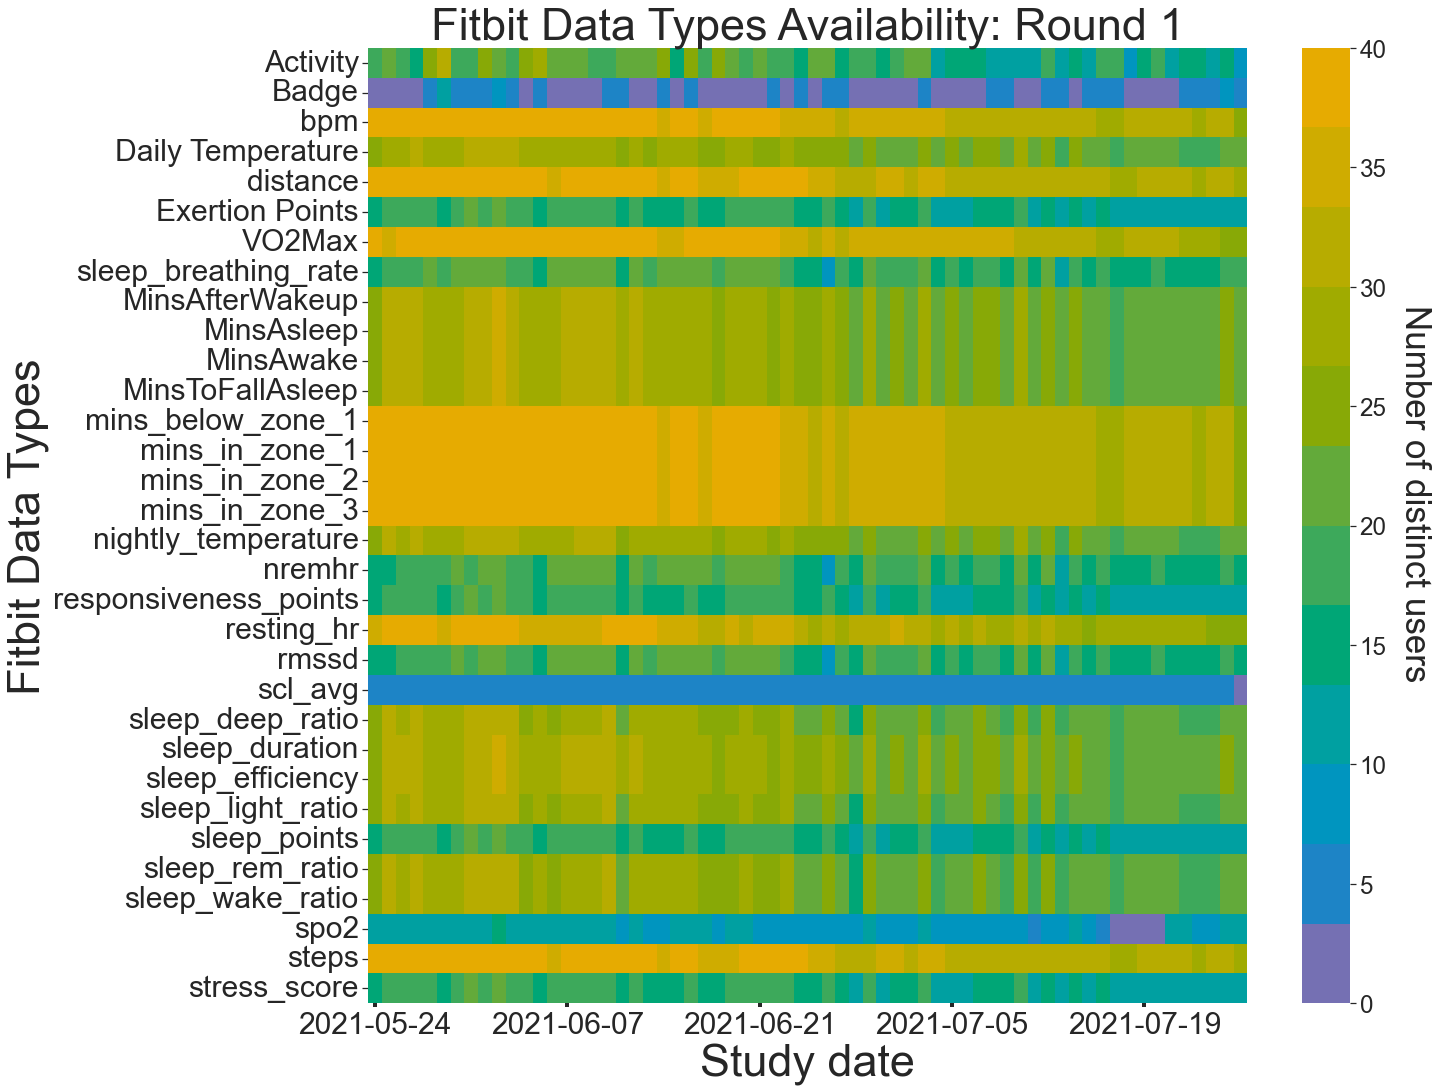

In [182]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.heatmap(piv1, cmap=cmap)
xticks = plt.gca().xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 7 != 0:
        xticks[i].set_visible(False)
xticks = plt.gca().xaxis.get_major_ticks()
plt.setp( ax.xaxis.get_majorticklabels(), rotation=0 )
plt.tight_layout()
plt.tight_layout()
ax.set_rasterization_zorder(0)
plt.xlabel('Study date', fontsize=45)
plt.ylabel('Fitbit Data Types', fontsize=45)
plt.text(75, 21, 'Number of distinct users', rotation=270, fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('Fitbit Data Types Availability: Round 1', fontsize=45)
plt.savefig(r"visualizations\Round1_all_fitbit_data_types_availability_heatmap.eps", bbox_inches='tight') 
plt.savefig(r"visualizations\Round1_all_fitbit_data_types_availability_heatmap.png", bbox_inches='tight') 
plt.show()

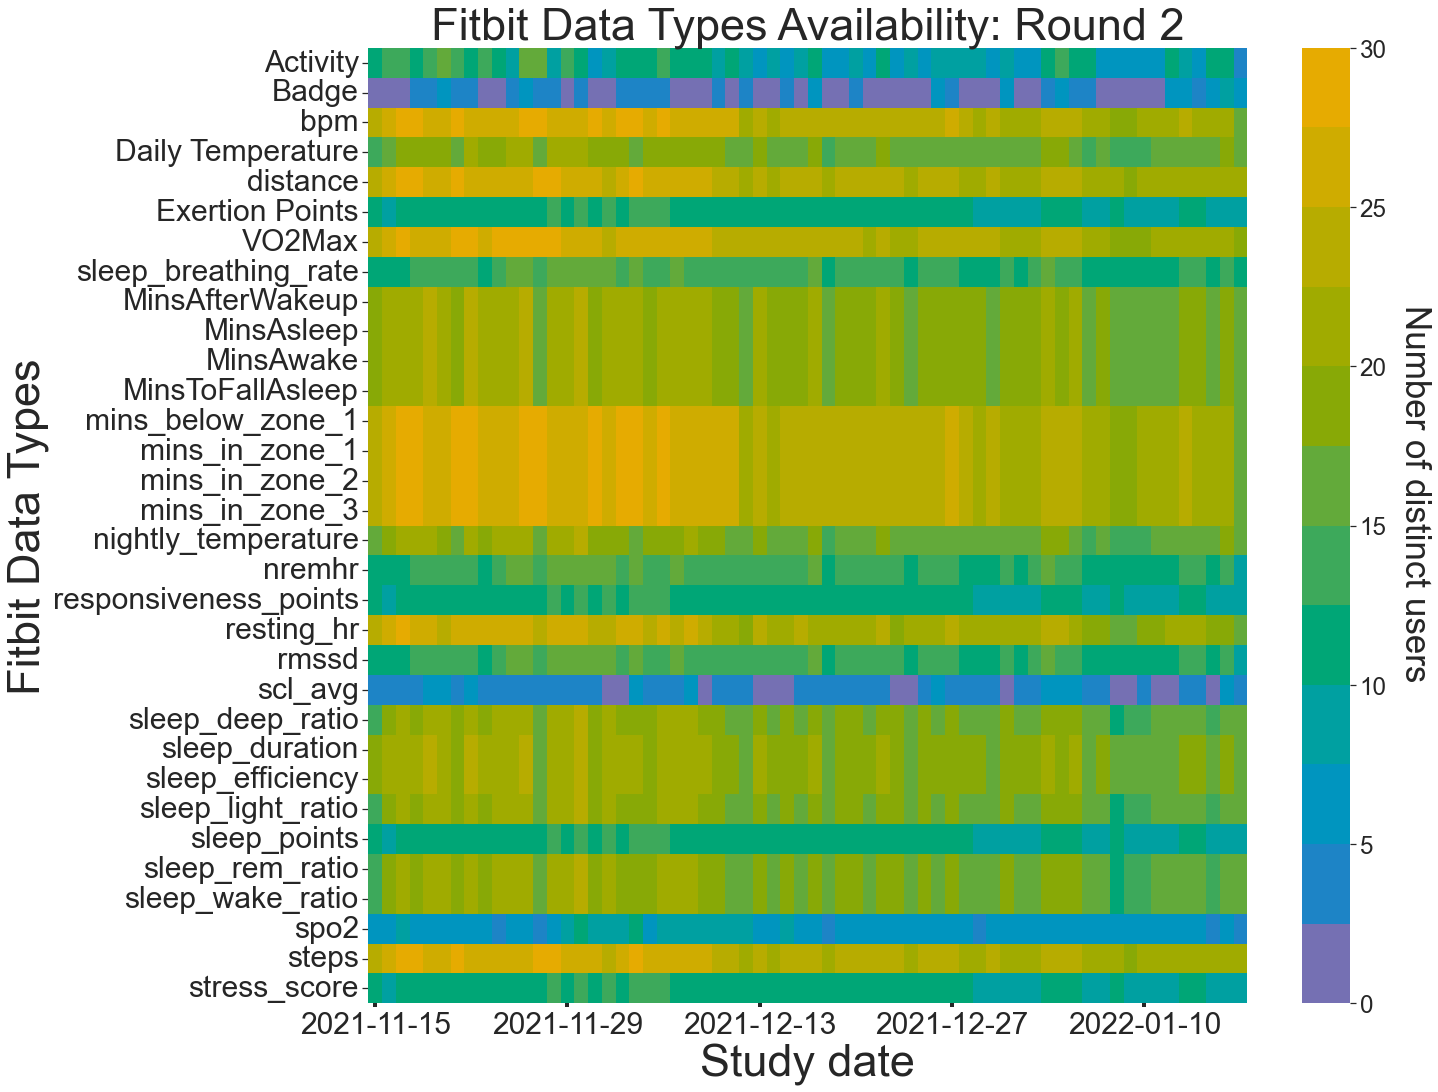

In [183]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.heatmap(piv2, cmap=cmap)
xticks = plt.gca().xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 7 != 0:
        xticks[i].set_visible(False)
xticks = plt.gca().xaxis.get_major_ticks()
plt.setp( ax.xaxis.get_majorticklabels(), rotation=0 )
plt.tight_layout()
plt.tight_layout()
ax.set_rasterization_zorder(0)
plt.xlabel('Study date', fontsize=45)
plt.ylabel('Fitbit Data Types', fontsize=45)
plt.text(75, 21, 'Number of distinct users', rotation=270, fontsize=35)
plt.title('Fitbit Data Types Availability: Round 2', fontsize=45)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.savefig(r"visualizations\Round2_all_fitbit_data_types_availability_heatmap.eps", bbox_inches='tight') 
plt.savefig(r"visualizations\Round2_all_fitbit_data_types_availability_heatmap.png", bbox_inches='tight') 
plt.show()